# Análisis de Crímenes 2024

Este notebook contiene el análisis exploratorio de datos sobre crímenes reportados en 2024.

## Importación de Librerías

Importamos las bibliotecas necesarias para el análisis de datos:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='whitegrid')

df = pd.read_csv('lib/Crimes_-_2024_20251030.csv')


print("Primeras 5 filas del dataset:")
display(df.head())
print('Data shape (filas, columnas)',df.shape)

print("Data types", df.dtypes)

columns = df.columns.tolist()
print("columns", columns)

print("Number of missing values (total):", df.isna().sum())
print("Number of columns with missing values:", (df.isna().any(axis=0)).sum())
print("Number of rows with missing values:", (df.isna().any(axis=1)).sum())


#todo - mapper object to camelCase columns
primary_col = "Primary Type"
location_description_col = "Location Description"
location_col = "Location"
arrest_col = "Arrest"



Primeras 5 filas del dataset:


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817.0,1860189.0,2024,05/17/2025 03:40:52 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740.0,1853048.0,2024,05/17/2025 03:40:52 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362.0,1861188.0,2024,05/17/2025 03:40:52 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Data shape (filas, columnas) (258783, 22)
Data types ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
columns ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',

## Análisis de Tipos de Datos

A continuación se muestra una tabla detallada de los tipos de datos para cada columna del dataset:

In [3]:
# Tabla simple: id (nombre de la columna) y tipo_de_dato (dtype)
tipos_tabla = pd.DataFrame({
    'id': df.columns.tolist(),
    'tipo_de_dato': [str(df[col].dtype) for col in df.columns]
})

print("\nTabla con id y tipo de dato:")
display(tipos_tabla)


Tabla con id y tipo de dato:


,id,tipo_de_dato
0,ID,int64
1,Case Number,object
2,Date,object
3,Block,object
4,IUCR,object
5,Primary Type,object
6,Description,object
7,Location Description,object
8,Arrest,bool
9,Domestic,bool


Grafica de location

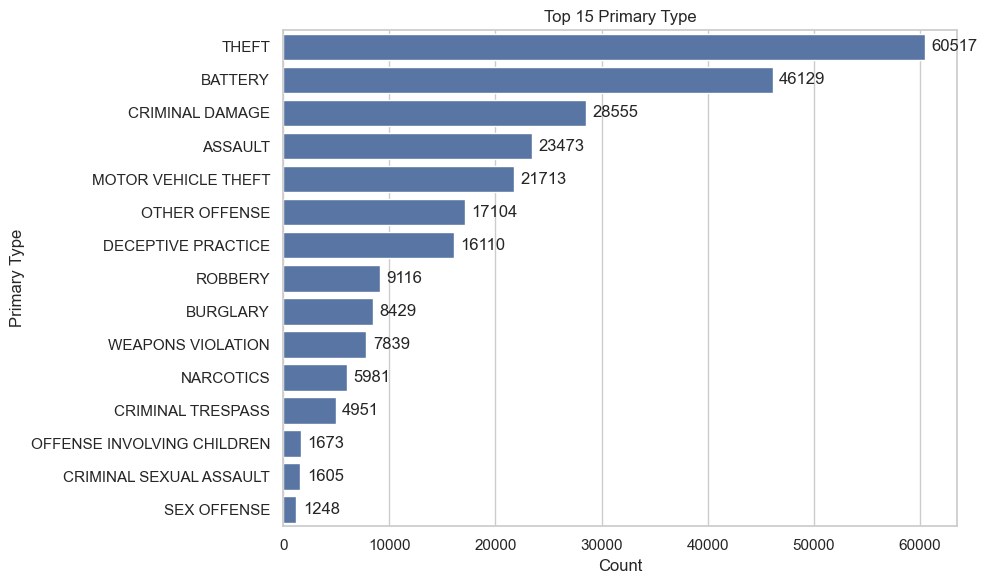

In [4]:
# crimenes
if primary_col in df.columns:
    pc = df[primary_col].fillna('Unknown')
    top = pc.value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top.values, y=top.index )
    plt.xlabel('Count')
    plt.title(f'Top 15 {primary_col}')
 
    for i, v in enumerate(top.values):
        plt.text(v + max(top.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'primary type'. Columnas disponibles:", list(df.columns))


Locations Description

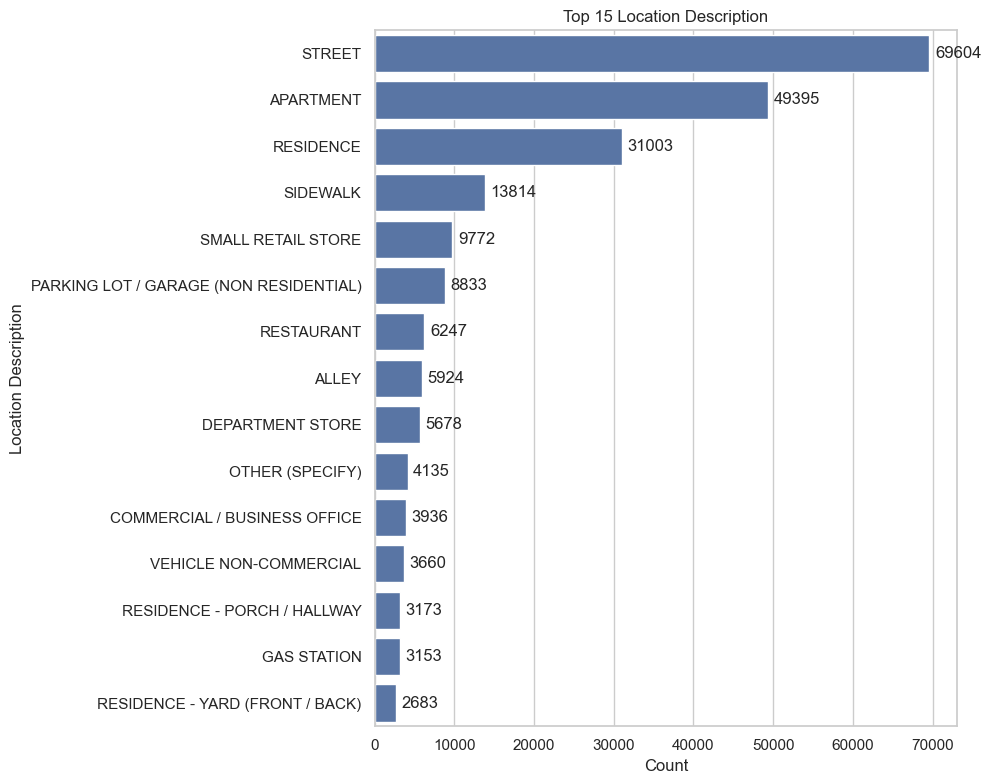

In [8]:
# locations_description
if location_description_col in df.columns:
    lc = df[location_description_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_description_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location description'. Columnas disponibles:", list(df.columns))

Location col (coordenadas)

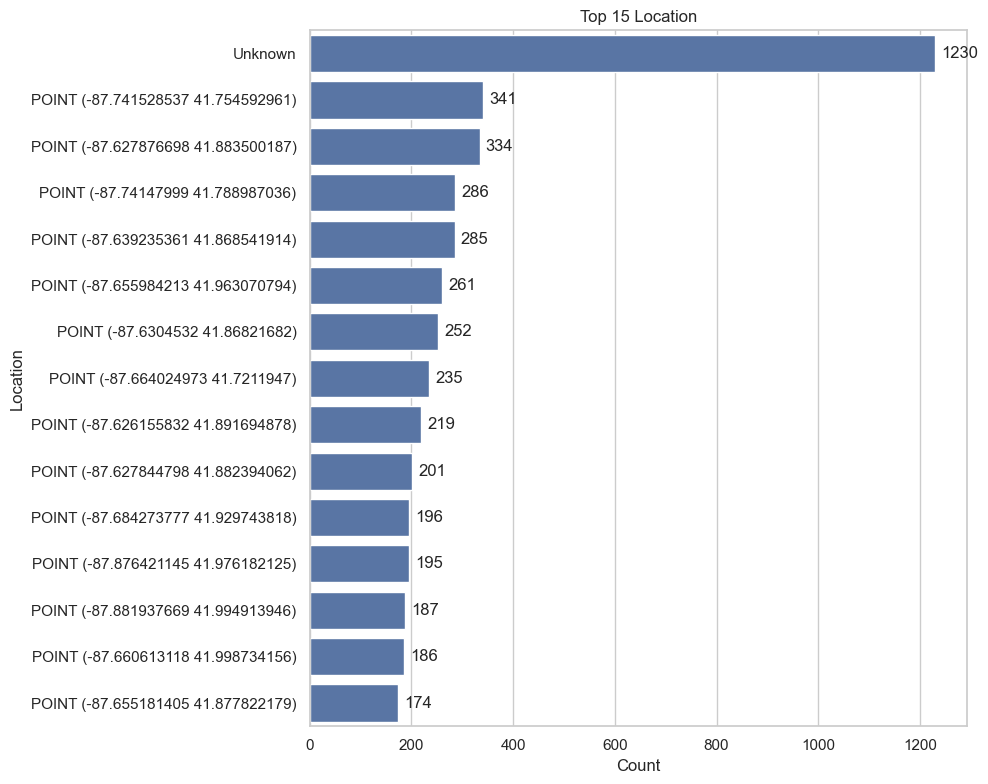

In [9]:
if location_col in df.columns:
    lc = df[location_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location'. Columnas disponibles:", list(df.columns))

Arrestos

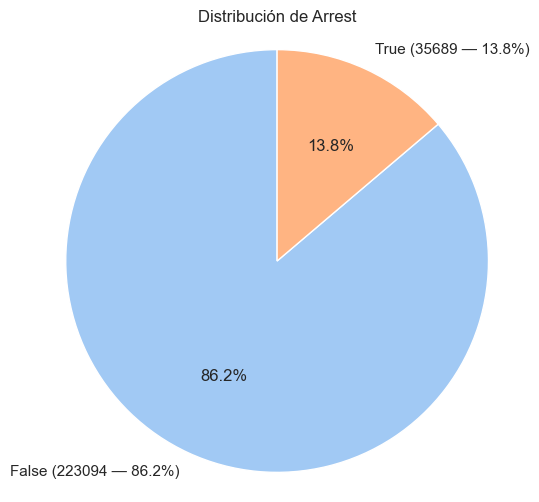

Conteos de arrest: Arrest
False    223094
True      35689
Name: count, dtype: int64


In [10]:
# distribucion de arrestos
if arrest_col in df.columns:
    ac = df[arrest_col].fillna('Unknown')
    counts = ac.value_counts(dropna=False)
    plt.figure(figsize=(6,6))
    labels = counts.index.astype(str)
    sizes = counts.values
    # Pie con etiquetas que contienen conteo y porcentaje
    plt.pie(sizes, labels=[f"{l} ({v} — {v/sizes.sum():.1%})" for l,v in zip(labels,sizes)],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Distribución de {arrest_col}')
    plt.axis('equal')
    plt.show()
    print('Conteos de arrest:', counts)
else:
    print("No se encontró columna para 'arrest'. Columnas disponibles:", list(df.columns))